In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Flight Price:

## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
flight_df = pd.read_excel(io="./data/flight_price.xlsx")
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
shape = flight_df.shape
print(f"The number of rows in Flight Price Dataset is: {shape[0]}")
print(f"The number of columns in Flight Price Dataset is: {shape[1]}")

The number of rows in Flight Price Dataset is: 10683
The number of columns in Flight Price Dataset is: 11


## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

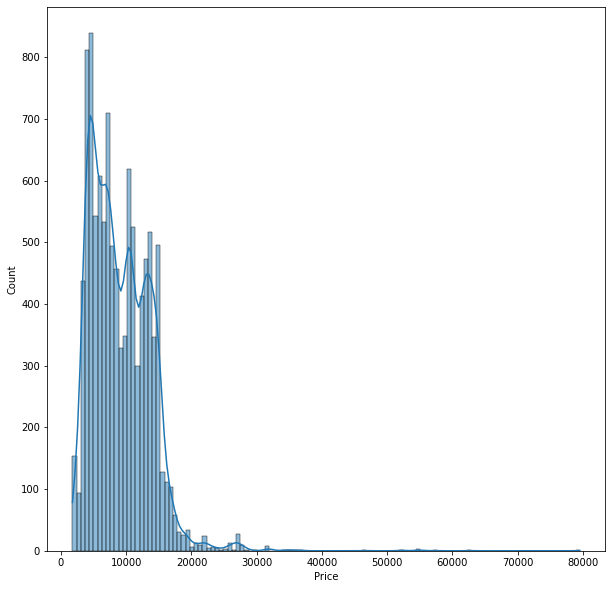

In [4]:
plt.figure(figsize=(10,10))
sns.histplot(data=flight_df, x="Price", kde=True)
plt.show()

##### So the Histogram plot of the Price variable in the Flight dataset doesn't show a Normal Distribution. The distribution is right skewed which also means that there are some outliers in the dataset.

## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
price_max = flight_df.loc[flight_df["Price"] == flight_df["Price"].max()]["Price"].values[0]
price_min = flight_df.loc[flight_df["Price"] == flight_df["Price"].min()]["Price"].values[0]
print(f"The Flight Price ranges between {price_min} and {price_max}")

The Flight Price ranges between 1759 and 79512


## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines?

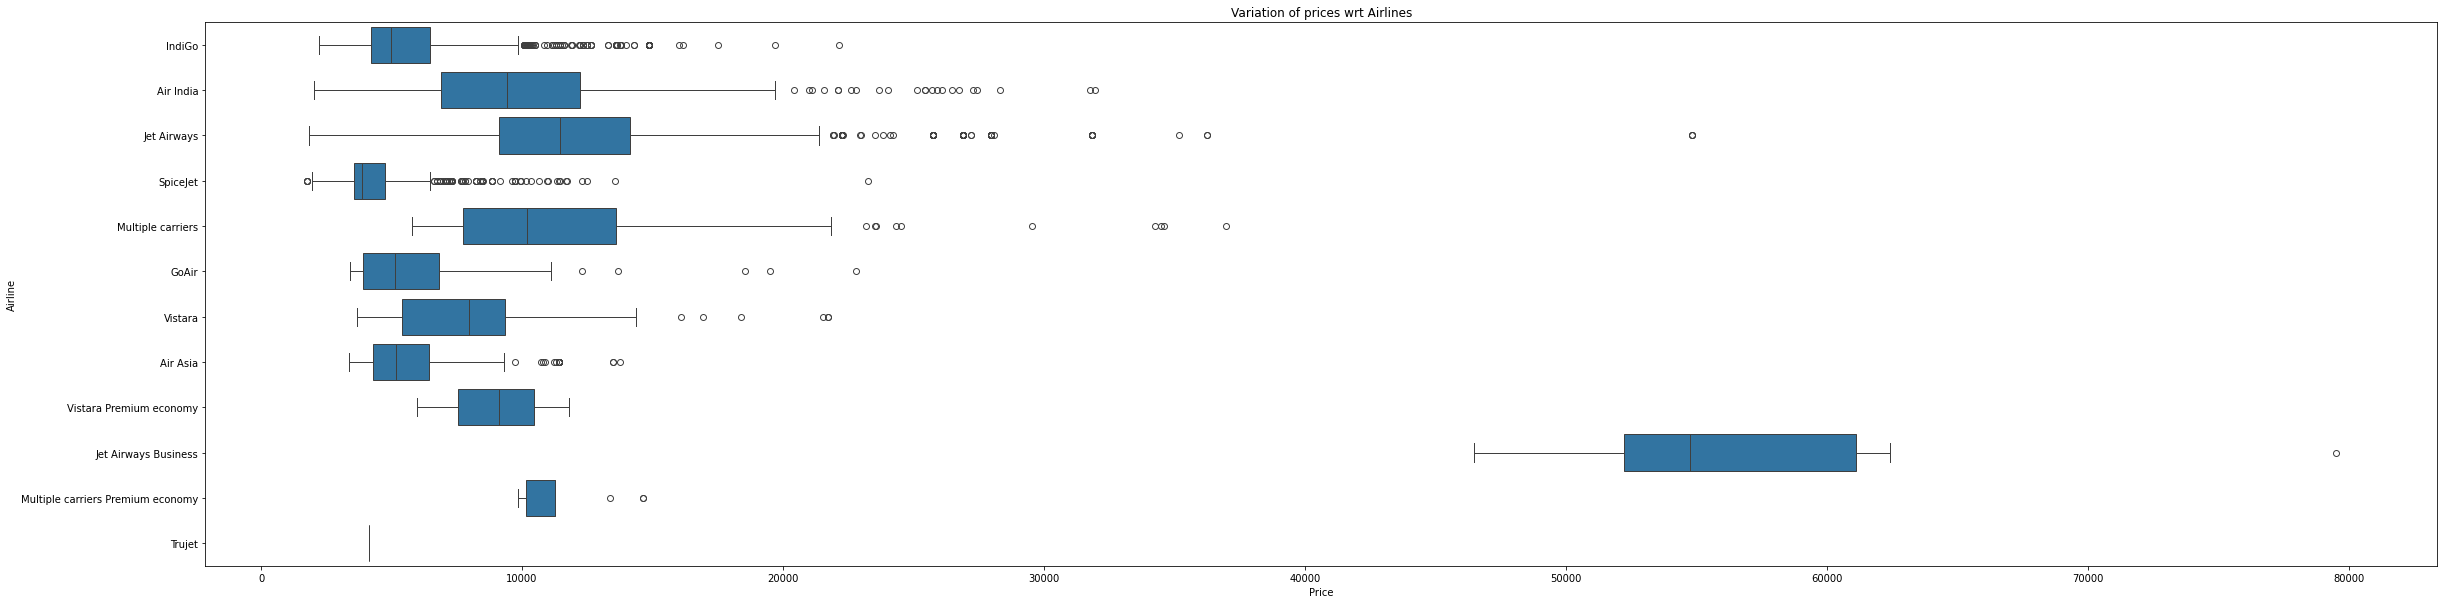

In [6]:
plt.figure(figsize=(40,10))
sns.boxplot(data=flight_df, x="Price", y="Airline")
plt.title("Variation of prices wrt Airlines")
plt.show()

##### From the above Boxplot, we can conclude that Jet Airways Business has the highest min and max values while in case of Trujet, both min and max are almost equal and lowest at the same time.

## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

##### A boxplot is a graphical representation of the distribution of a dataset based on five summary statistics: minimum value, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum value. It also displays any potential outliers in the dataset, which are defined as observations that are more than 1.5 times the interquartile range (IQR) below the first quartile or above the third quartile.

##### Here are some ways in which outliers can influence the results and interpretation of data analysis:

##### 1. Skew Data Distribution: Outliers can skew the distribution of the data, making it non-normally distributed. This can affect the validity of statistical tests and assumptions that assume normality, such as t-tests and linear regression.

##### 2. Misleading Descriptive Statistics: Outliers can heavily influence summary statistics like the mean and standard deviation. The mean can be significantly distorted by extreme values, leading to a poor representation of the central tendency of the data.

##### 3. Influence on Regression Models: Outliers can have a strong impact on regression models. They can lead to model instability, inflated coefficients, and reduced predictive accuracy. Some models are particularly sensitive to outliers, such as ordinary least squares (OLS) regression.

##### 4. Impact on Machine Learning Models: In machine learning, outliers can influence the performance of models, especially when using algorithms that are sensitive to variations in the data. Outliers can lead to overfitting or underfitting.

##### 5. Data Interpretation: Outliers can sometimes carry valuable information or insights. Their removal can result in the loss of valuable knowledge, so it's important to carefully consider whether to keep or discard outliers.

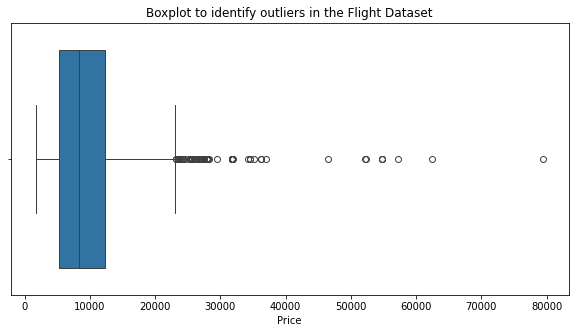

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(data=flight_df, x="Price")
plt.title("Boxplot to identify outliers in the Flight Dataset")
plt.show()

#### Let's fiend out the outliers with the help of Inter Quartile Range(IQR)

In [8]:
q1 = np.percentile(flight_df["Price"], 25)
q3 = np.percentile(flight_df["Price"], 75)

iqr = q3 - q1

print(f"Quartile 1 is : {q1}")
print(f"Quartile 3 is : {q3}")
print(f"IQR is : {iqr}")

# Define the threshold (1.5 times the IQR)
threshold = 1.5

# Identify and calculate the outliers
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

Quartile 1 is : 5277.0
Quartile 3 is : 12373.0
IQR is : 7096.0


##### Since there are no outliers below the minimum value as could be observed from the above boxplot, let's find out the outliers on the postive side which are greater than 3rd Quartile.

In [9]:
flight_df[flight_df["Price"] > upper_bound]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


##### So, there are in total 94 outliers in the flight dataset.

## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [10]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##### There are multiple ways to determine the peak travel season:

##### 1. Month of the year - The month in which travelling is happening the most can reveal the peak travel season and can be presented with proper visualizations as well.

In [11]:
flight_df["Date_of_Journey"] = pd.to_datetime(flight_df["Date_of_Journey"])
flight_df["Date"] = flight_df["Date_of_Journey"].dt.day
flight_df["Month"] = flight_df["Date_of_Journey"].dt.month
flight_df["Year"] = flight_df["Date_of_Journey"].dt.year
flight_df["Day"] = flight_df["Date_of_Journey"].dt.day_name()
# flight_df.drop(labels=["Date_of_Journey"], inplace=True, axis=1)
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,Sunday
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,Sunday
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,Friday


In [12]:
# Let's find out the unique years first
flight_df["Year"].unique()

array([2019])

##### So, it  makes our analysis easy since it has only one year

In [13]:
month_wise_flight_df = flight_df.groupby(by='Month').count()["Price"].sort_values()
month_wise_flight_df

Month
4    1079
3    2724
6    3414
5    3466
Name: Price, dtype: int64

##### So, the peak month in which the people travelled the most is the 5th Month which is usually Summer season in India.

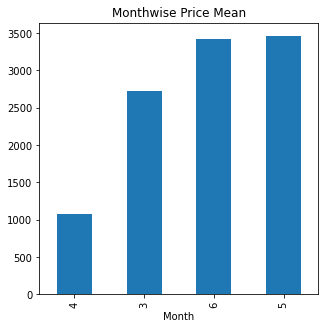

In [14]:
plt.figure(figsize=(5,5))
flight_df.groupby(by='Month').count()["Price"].sort_values().plot(kind="bar")
plt.title("Monthwise Price Mean")
plt.show()

##### 2. Day of the Week - Let's visualize and check which day of the week most of the travelling have happened.

In [15]:
day_wise_flight_df = flight_df.groupby(by=["Day"])["Price"].mean().sort_values()
day_wise_flight_df

Day
Monday       8499.530811
Thursday     8931.379367
Saturday     8972.905389
Tuesday      9026.149597
Wednesday    9277.514190
Sunday       9525.508820
Friday       9717.996700
Name: Price, dtype: float64

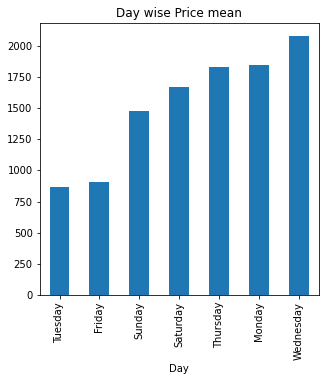

In [16]:
plt.figure(figsize=(5,5))
flight_df.groupby(by=["Day"])["Price"].count().sort_values().plot(kind="bar")
plt.title("Day wise Price mean")
plt.show()

##### We can observe that since the Price mean is highest on Wednesday which infers that most of the travelling happened on Wednesday. This could be due to lower price range of the airlines during the mid week flights.

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [17]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,Sunday
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,Sunday
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,Friday


##### There are multiple ways to understand the trends of flight prices. Some of them are as follows:

##### 1. Destination - Let's try to find out the top 10 destinations which has the maximum flight prices.

In [18]:
flight_df_price = flight_df.sort_values(by=["Price"], ascending=False)
flight_df_price.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day
2924,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,1,3,2019,Friday
5372,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,1,3,2019,Friday
10364,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,1,3,2019,Friday
1478,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3,2019,Monday
5439,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826,1,3,2019,Friday
2618,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3,2019,Monday
9715,Jet Airways Business,2019-03-06,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285,6,3,2019,Wednesday
657,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229,1,3,2019,Friday
7351,Jet Airways Business,2019-03-03,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490,3,3,2019,Sunday
396,Multiple carriers,2019-03-01,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983,1,3,2019,Friday


In [19]:
costly_destinations = flight_df_price.head(10)["Destination"].unique()
print(f"The top 10 destinations which has the most costly flight tickets are: {costly_destinations}")

The top 10 destinations which has the most costly flight tickets are: ['New Delhi' 'Cochin']


##### 2. Date_wise - Let's checkout the price variation of the flights monthly using lineplot.

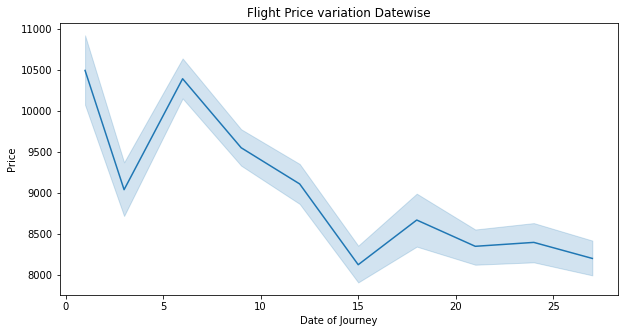

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(data=flight_df, x="Date", y="Price")
plt.title("Flight Price variation Datewise")
plt.xlabel("Date of Journey")
plt.show()

##### 3. Airlinewise - Let's checkout the variation of lfight prices wrt Airlines.

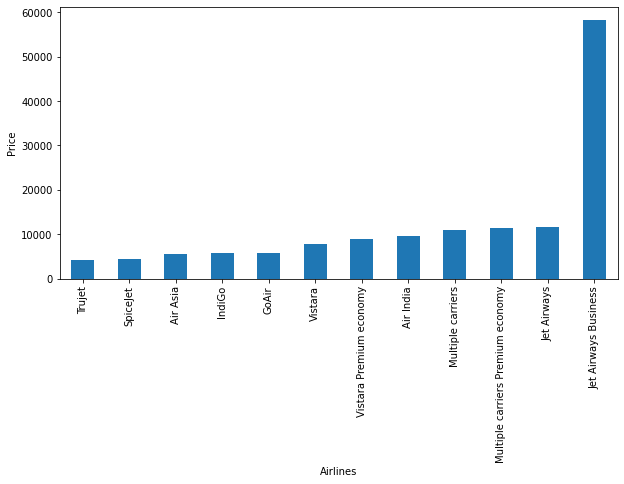

In [21]:
plt.figure(figsize=(10,5))
flight_df.groupby(by=["Airline"])["Price"].mean().sort_values().plot(kind="bar")
plt.xlabel("Airlines")
plt.ylabel("Price")
plt.show()

##### So, we can infer that the Trujet airline has the cheapest flights while Jet Airways Business has the most expensive flights among all.

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [22]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,Sunday
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,Sunday
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,Friday


##### There could be multiple factors which contribute towards the fluctuation of the flight prices. Let's discuss some of them below:

##### 1. Stops - There could be possible scenario that the more number of stops could lead to fluctuation in flight prices.

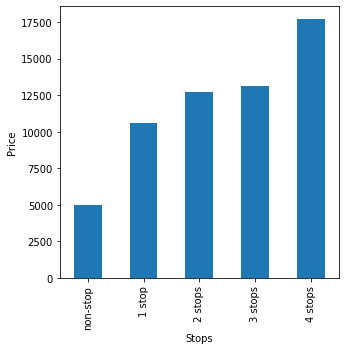

In [23]:
plt.figure(figsize=(5,5))
stops_flight_df = flight_df.groupby(by=["Total_Stops"])["Price"].mean().sort_values().plot(kind="bar")
plt.ylabel("Price")
plt.xlabel("Stops")
plt.show()

##### So, from the above plot, we can infer that the higher the number of stops, the more is the flight fare since the flights with 4 stops have a mean flight price range higher than any other stops and it is incremental.

##### Since there are multiple features in the dataset that could have an impact on the price of the flights:

##### 2. Time - Flight prices could be more or less depending on the time of the flights.
##### 3. Route - FLight prices may vary with the route. If the route is very frequently traversed, then it could lead to a higher price range.
##### 4.Demand - Flight prices may vary with the demand of a particular flight bound for a particular destination and also the rush for booking the seats for the flight.

##### To represent all the analysis, we will form a regression analysis on the dataset and determine which features impact the most for the prices of the flights.

## Data Cleaning and Feature Engineering

## Let's modify the Day feature to numeric for the model to process it.

In [24]:
flight_df["Day"] = flight_df["Date_of_Journey"].dt.dayofweek
flight_df.drop(labels=["Date_of_Journey"], axis=1, inplace=True)
flight_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,2


## We will have to modify Arrival_Time and Dep_Time for the model to understand these features numerically.

In [25]:
flight_df["Arrival_Time"] = flight_df["Arrival_Time"].apply(lambda t : t.split(" ")[0])
flight_df["Arrival_Hour"] = flight_df["Arrival_Time"].apply(lambda t : t.split(":")[0]).astype(int)
flight_df["Arrival_Min"] = flight_df["Arrival_Time"].apply(lambda t : t.split(":")[1]).astype(int)
flight_df.drop(labels=["Arrival_Time"], axis=1, inplace=True)
flight_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,6,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,2,13,15


In [26]:
flight_df["Dep_Time"] = flight_df["Dep_Time"].apply(lambda t : t.split(" ")[0])
flight_df["Dep_Hour"] = flight_df["Dep_Time"].apply(lambda t : t.split(":")[0]).astype(int)
flight_df["Dep_Min"] = flight_df["Dep_Time"].apply(lambda t : t.split(":")[1]).astype(int)
flight_df.drop(labels=["Dep_Time"], axis=1, inplace=True)
flight_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,6,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,2,13,15,5,50


In [27]:
def duration(t):
    h = 0
    m = 0
    if (t.find("h") > 0 and t.find("m") > 0):
        h = t.split(" ")[0].split("h")[0]
        m = t.split(" ")[1].split("m")[0]
    elif (t.find("h") > 0 and t.find("m") < 0):
        h = t.split("h")[0]
    elif (t.find("h") < 0 and t.find("m") > 0):
        m = t.split("m")[0]
    duration_in_hours = float(h) + float(m) / 60
    return duration_in_hours

In [28]:
flight_df["Duration"] = flight_df["Duration"].apply(duration)
flight_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,No info,3897,24,3,2019,6,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,1,5,2019,2,13,15,5,50


## Let's check the null data in the flight dataset first

In [29]:
flight_df.isna().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Day                0
Arrival_Hour       0
Arrival_Min        0
Dep_Hour           0
Dep_Min            0
dtype: int64

In [30]:
flight_df[flight_df["Total_Stops"].isna()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
9039,Air India,Delhi,Cochin,NaN,23.666667,NaN,No info,7480,6,5,2019,0,9,25,9,45


In [31]:
total_stops_mode = flight_df["Total_Stops"].mode()[0]
flight_df["Total_Stops"] = flight_df["Total_Stops"].fillna(total_stops_mode)
flight_df["Total_Stops"].isna().sum()

0

In [32]:
stops_map = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

flight_df["Total_Stops"] = flight_df["Total_Stops"].map(stops_map)
flight_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,0,No info,3897,24,3,2019,6,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2,No info,7662,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2,No info,13882,9,6,2019,6,4,25,9,25


## Drop the Additional_Info and Route column as route is already captured through the number of stops.

In [33]:
flight_df.drop(labels = ["Additional_Info", "Route"], axis=1, inplace=True)
flight_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Day,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2.833333,0,3897,24,3,2019,6,1,10,22,20
1,Air India,Kolkata,Banglore,7.416667,2,7662,1,5,2019,2,13,15,5,50


## Let's now find out the duplicates

In [34]:
flight_df.duplicated().sum()

222

In [35]:
flight_df.drop_duplicates(keep="first", inplace=True)
flight_df.shape

(10461, 14)

In [36]:
# Let's save this csv file
flight_df.to_csv("./data/cleaned_flight_price.csv", index=False)
flight_df = pd.read_csv(filepath_or_buffer="./data/cleaned_flight_price.csv")
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10461 entries, 0 to 10460
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       10461 non-null  object 
 1   Source        10461 non-null  object 
 2   Destination   10461 non-null  object 
 3   Duration      10461 non-null  float64
 4   Total_Stops   10461 non-null  int64  
 5   Price         10461 non-null  int64  
 6   Date          10461 non-null  int64  
 7   Month         10461 non-null  int64  
 8   Year          10461 non-null  int64  
 9   Day           10461 non-null  int64  
 10  Arrival_Hour  10461 non-null  int64  
 11  Arrival_Min   10461 non-null  int64  
 12  Dep_Hour      10461 non-null  int64  
 13  Dep_Min       10461 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 1.1+ MB


In [38]:
num_cols = flight_df.columns[flight_df.dtypes != "object"]
cat_cols = flight_df.columns[flight_df.dtypes == "object"]
print(f"The numerical columns are: {num_cols}")
print(f"The categorical columns are: {cat_cols}")

The numerical columns are: Index(['Duration', 'Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Day',
       'Arrival_Hour', 'Arrival_Min', 'Dep_Hour', 'Dep_Min'],
      dtype='object')
The categorical columns are: Index(['Airline', 'Source', 'Destination'], dtype='object')


In [44]:
# Let's One Hot encode the categorical columns
one_hot_encoded = pd.get_dummies(flight_df[cat_cols], dtype=int)
one_hot_encoded

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10457,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10458,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
final_df = pd.concat([one_hot_encoded, flight_df[num_cols]], axis=1)
final_df.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Total_Stops,Price,Date,Month,Year,Day,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,0,0,0,1,0,0,0,0,0,0,...,0,3897,24,3,2019,6,1,10,22,20
1,0,1,0,0,0,0,0,0,0,0,...,2,7662,1,5,2019,2,13,15,5,50
2,0,0,0,0,1,0,0,0,0,0,...,2,13882,9,6,2019,6,4,25,9,25
3,0,0,0,1,0,0,0,0,0,0,...,1,6218,12,5,2019,6,23,30,18,5
4,0,0,0,1,0,0,0,0,0,0,...,1,13302,1,3,2019,4,21,35,16,50


In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10461 entries, 0 to 10460
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline_Air Asia                           10461 non-null  int32  
 1   Airline_Air India                          10461 non-null  int32  
 2   Airline_GoAir                              10461 non-null  int32  
 3   Airline_IndiGo                             10461 non-null  int32  
 4   Airline_Jet Airways                        10461 non-null  int32  
 5   Airline_Jet Airways Business               10461 non-null  int32  
 6   Airline_Multiple carriers                  10461 non-null  int32  
 7   Airline_Multiple carriers Premium economy  10461 non-null  int32  
 8   Airline_SpiceJet                           10461 non-null  int32  
 9   Airline_Trujet                             10461 non-null  int32  
 10  Airline_Vistara       

In [47]:
X = final_df.drop(labels=["Price"], axis=1)
Y = final_df["Price"]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [52]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8368, 33), (8368,), (2093, 33), (2093,))

## Let's apply the AdaBoost regressor model for Regression Analysis

In [129]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base = DecisionTreeRegressor(max_depth=5)

model = AdaBoostRegressor(base_estimator=base, loss="square", learning_rate=0.001, n_estimators=50)
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.001, loss='square')

In [130]:
# Let's predict with the model trained above
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [131]:
# Let's evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return mae, mse, r2

In [132]:
def print_eval_metrics(y_train, y_train_pred, y_test, y_test_pred):
    train_mae, train_mse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    print("Model Performance for Training dataset")
    print(f"-The training mean absolute error is: {train_mae}")
    print(f"-The training mean squared error is: {train_mse}")
    print(f"-The training r2_score is: {train_r2}")
    print("********************************************")
    print("Model Performance for Test dataset")
    print(f"-The test mean absolute error is: {test_mae}")
    print(f"-The test mean squared error is: {test_mse}")
    print(f"-The test r2_score is: {test_r2}")

In [133]:
print_eval_metrics(y_train, y_train_pred, y_test, y_test_pred)

Model Performance for Training dataset
-The training mean absolute error is: 1753.7236306064804
-The training mean squared error is: 6258138.172407921
-The training r2_score is: 0.7073157706048196
********************************************
Model Performance for Test dataset
-The test mean absolute error is: 2913.737162339231
-The test mean squared error is: 16746828.671963133
-The test r2_score is: 0.2173215553388157


In [135]:
feature_imp = pd.DataFrame(model.feature_importances_, columns=["imp"])
feature_imp.index = model.feature_names_in_
feature_imp = feature_imp.sort_values(by=["imp"], ascending=False)
feature_imp

,imp
Duration,0.608225
Date,0.098641
Airline_Jet Airways,0.081004
Airline_Jet Airways Business,0.060120
Total_Stops,0.035194
Destination_New Delhi,0.026561
Month,0.022488
Airline_Multiple carriers,0.018217
Arrival_Hour,0.015065
Source_Banglore,0.008721


##### Let's plot the feaure importances that contribute towards determining the flight prices.

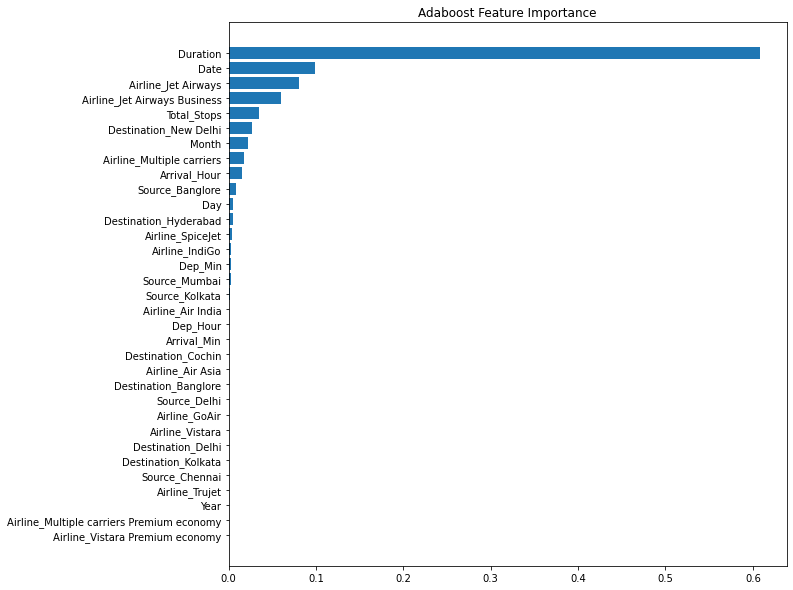

In [136]:
plt.figure(figsize=(10,10))
plt.barh(y=feature_imp.sort_values(by="imp").index, width=feature_imp.sort_values(by="imp")["imp"])
plt.title("Adaboost Feature Importance")
plt.show()

##### Top 5 important features for Flight price prediction are as follows:

##### 1. Duration of Flight in hours
##### 2. Date
##### 3. Airline_Jet Airways
##### 4. Month
##### 5. Total Stops

# Google Playstore:

## Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [78]:
playstore_df = pd.read_csv(filepath_or_buffer="./data/googleplaystore.csv")
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore_df.drop(10472, inplace=True)

In [79]:
shape = playstore_df.shape
print(f"The number of rows in the Playstore dataset are: {shape[0]}")
print(f"The number of columns in the Playstore dataset are: {shape[1]}")

The number of rows in the Playstore dataset are: 10841
The number of columns in the Playstore dataset are: 13


## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

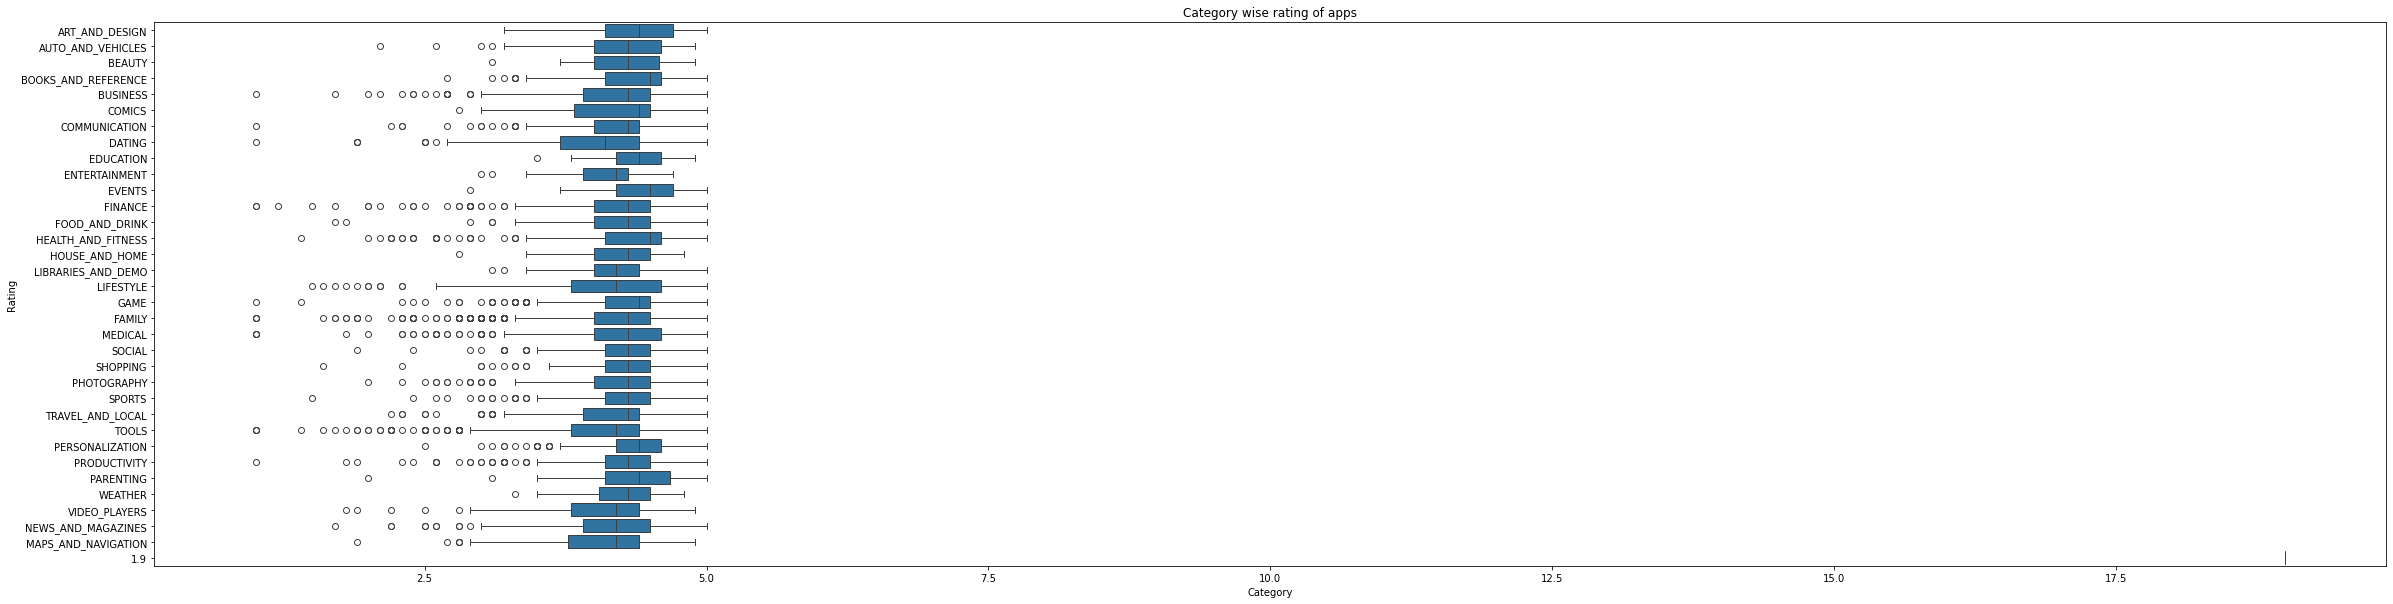

In [80]:
plt.figure(figsize=(40,10))
sns.boxplot(data=playstore_df, x="Rating", y="Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Category wise rating of apps")
plt.show()

## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [81]:
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### So, there are a lot of data points which have null values in the datatset. Let's have a look at those rows which have null values in the Rating feature.

##### 1. 1474 missing values for Rating feature.
##### 2. 1 missing values for Type feature.
##### 3. 1 missing values for Content Rating feature.
##### 4. 8 missing values for Current Ver feature.
##### 5. 3 missing values for Android Ver feature.

In [82]:
playstore_df[playstore_df["Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


##### Some of the impacts of missing data are as follows:

##### 1. Bias in Results: Missing values can introduce bias in the analysis. If the data is not missing completely at random (MCAR), meaning that the probability of a value being missing depends on other observed variables, the analysis results can be skewed. This can lead to incorrect conclusions and interpretations.

##### 2. Reduced Sample Size: Missing values reduce the effective sample size available for analysis. This can lead to decreased statistical power and less precise estimates of model parameters, which may affect the reliability of the results.

##### 3. Imputation Challenges: Handling missing data requires imputation, which is the process of filling in the gaps. The choice of imputation method can impact the results. Simple imputation methods like mean, median, or mode imputation may not capture the true underlying patterns, while more advanced techniques like multiple imputation can provide more accurate estimates.

##### 4. Interpretability: In cases where data is missing for important variables, it can make it challenging to interpret the results correctly, as you may not have a complete picture of the underlying patterns or relationships.

## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [83]:
playstore_df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [84]:
playstore_df[playstore_df["Size"] == "Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


##### Since, the size feature has various sorts of values and are not of equal dimension, we have to update this feature to bring to same sort of values in order to proeprly visualize it.

In [85]:
chars_to_remove = ["+", "$", ","]
cols_to_clean = ["Size", "Price", "Installs"]

for char in chars_to_remove:
    for col in cols_to_clean:
        playstore_df[col] = playstore_df[col].str.replace(char, '')

In [86]:
# Replacing the size values to all "k" values
playstore_df["Size"] = playstore_df["Size"].str.replace('M','000')
playstore_df["Size"] = playstore_df["Size"].str.replace('k','')
playstore_df["Size"] = playstore_df["Size"].replace('Varies with device',np.nan)
playstore_df["Size"] = playstore_df["Size"].astype(float)

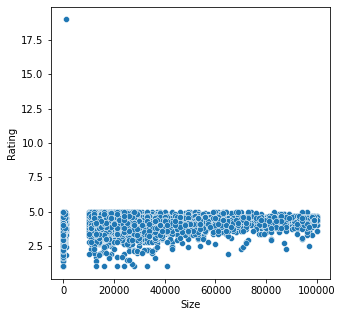

In [87]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=playstore_df, x="Size", y="Rating", )
plt.show()

In [88]:
play_df = playstore_df[["Size", "Rating"]]
play_df.head()

,Size,Rating
0,19000.0,4.1
1,14000.0,3.9
2,8.7,4.7
3,25000.0,4.5
4,2.8,4.3


In [89]:
play_df.corr(method="spearman")

,Size,Rating
Size,1.000000,0.052278
Rating,0.052278,1.000000


##### Since the correlation is very less, there is no correlation between the Size and the Rating features.

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [90]:
playstore_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [91]:
playstore_df["Type"].isna().sum()

1

In [92]:
playstore_df["Type"].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

##### So, there is 1 null value for Type column

In [93]:
playstore_df[playstore_df["Type"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [94]:
type_mode = playstore_df["Type"].mode()[0]
type_mode

'Free'

In [95]:
playstore_df["Type"] = playstore_df["Type"].fillna(value=type_mode)
playstore_df["Type"].isna().sum()

0

In [105]:
playstore_df.loc[10472, 'Price'] = 0

In [106]:
playstore_df["Price"] = playstore_df["Price"].astype(float)

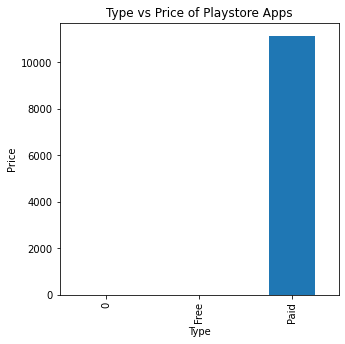

In [107]:
plt.figure(figsize=(5,5))
playstore_df.groupby(by="Type")["Price"].sum().sort_values().plot(kind="bar")
plt.xlabel("Type")
plt.ylabel("Price")
plt.title("Type vs Price of Playstore Apps")
plt.show()

#### So, free apps have 0 mean price while paid apps have a mean price greater than 10k.

## Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [108]:
playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [113]:
playstore_df["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [116]:
playstore_df[playstore_df["Installs"] =="Free"]
playstore_df.loc[10472, 'Installs'] = 100

In [117]:
playstore_df["Installs"] = playstore_df["Installs"].astype(int)

In [118]:
install_wise_df = playstore_df.sort_values(by=["Installs"], ascending=False)
install_wise_df.head(10)[["Installs", "App", "Rating"]]

,Installs,App,Rating
3896,1000000000,Subway Surfers,4.5
3943,1000000000,Facebook,4.1
335,1000000000,Messenger – Text and Video Chat for Free,4.0
3523,1000000000,Google Drive,4.4
3565,1000000000,Google Drive,4.4
2884,1000000000,Google Photos,4.5
3665,1000000000,YouTube,4.3
2853,1000000000,Google Photos,4.5
4234,1000000000,Skype - free IM & video calls,4.1
3687,1000000000,Google Play Movies & TV,3.7


## Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

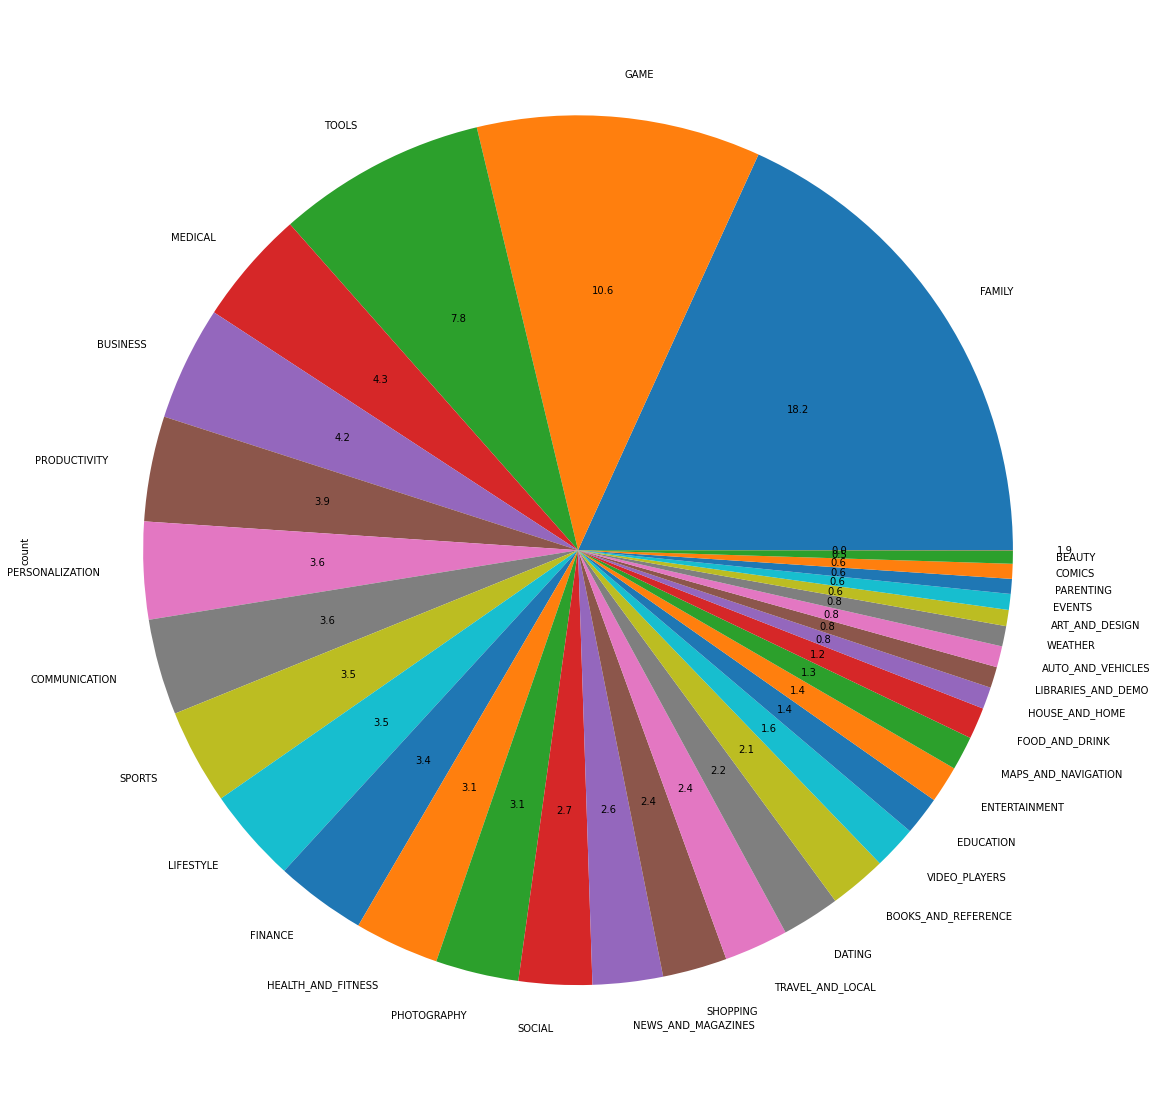

In [121]:
playstore_df["Category"].value_counts().plot.pie(y=playstore_df["Category"], figsize=(20,20),autopct="%1.1f")
plt.show()

##### So the most popular App category is Family, followed by Game, Tools, Medical, Business and so on.

In [122]:
playstore_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


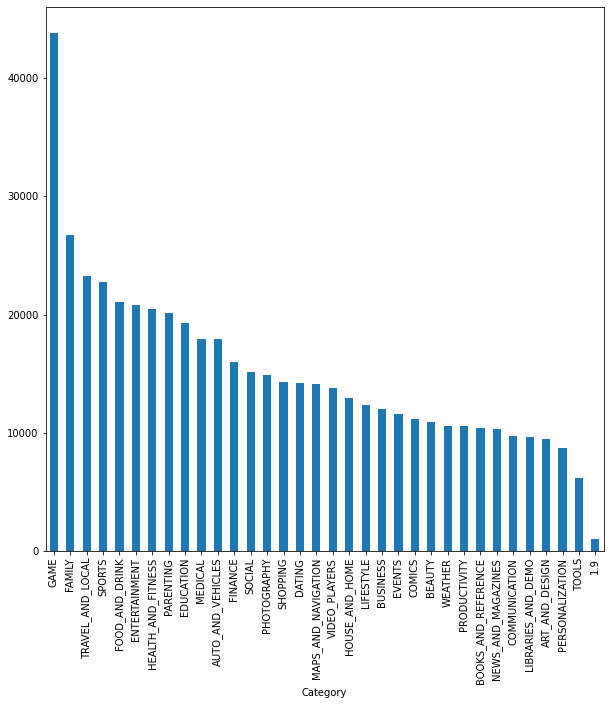

In [144]:
playstore_df.groupby(by="Category")["Size"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(10,10))
plt.show()

##### Insights:

##### 1. Top 3 categories are - Family, Game, Tools
##### 2. Top 3 categories wrt Size - Game, Family, Travel_and_Local

## Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [145]:
playstore_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


#####  To identify the most successful app developers in the Google Play Store, we would need to analyze various features such as:

##### 1. Installs - This indicates the popularity of an app.
##### 2. Rating - This indicates how did the app satisfied the customer needs.
##### 3. Reviews - There can be positive or negative sentiments but the reviews indicates possible areas of improvement.
##### 4. Size - Size of the app impacts the usability and experience of any user.

## 1. Installs

In [147]:
playstore_df.sort_values(by=["Installs", "Rating"], ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device


In [149]:
playstore_df.groupby(by=['Category','Installs'])['Rating'].mean()

Category        Installs
1.9             100         19.000000
ART_AND_DESIGN  0                 NaN
                100          5.000000
                1000         4.366667
                5000         4.375000
                              ...    
WEATHER         500000       4.428571
                1000000      4.233333
                5000000      4.112500
                10000000     4.327273
                50000000     4.420000
Name: Rating, Length: 515, dtype: float64

In [156]:
playstore_df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [161]:
playstore_df[playstore_df["Genres"] == "February 11, 2018"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,100,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [162]:
playstore_df.loc[10472, 'Genres'] = playstore_df["Genres"].mode()[0]

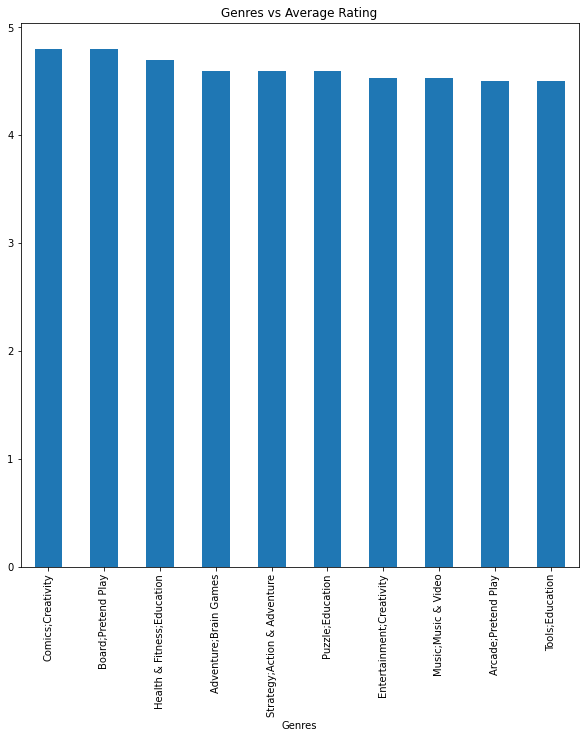

In [163]:
playstore_df.groupby(by='Genres')['Rating'].mean().sort_values(ascending=False)[0:10].plot(kind='bar',
                                                                                      figsize=(10,10),
                                                                                      title='Genres vs Average Rating')
plt.show()

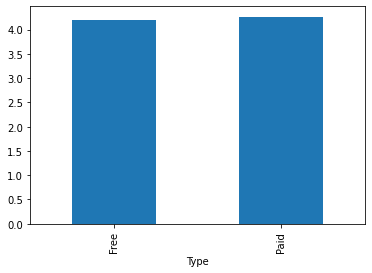

In [169]:
playstore_df.groupby(by='Type')['Rating'].mean().plot(kind='bar')
plt.show()

##### Insights :


##### 1. Top 3 apps with highest Installs and Ratings are : Subway Surfers, Instagram and Google Photos
##### 2. Top 3 Genres with highest Average Rating are : Comics , Board, Health and fitness
##### 3. Paid apps have slightly better average Rating
##### 4. Free apps are installed a lot when compared to Paid apps.

## Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [170]:
playstore_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


##### To identify the best time to launch a new app, we would need to analyze various features such as:

##### 1. Seasonality: Certain categories of apps may perform better during specific seasons (e.g., fitness apps during the new year or travel apps during the summer).

##### 2. Monthly trends: Analyzing the number of downloads, rating, and reviews over time could help identify trends in user behavior and preferences.

##### 3. Day of the week: The day of the week may impact app usage and downloads. For example, weekdays may see higher usage for productivity apps, while weekends may see higher usage for gaming apps.

##### 4. Competition: Analyzing the number of apps in a particular category and their performance could provide insights into the level of competition in the market.

##### 5. User demographics: Understanding the demographics of the app's target audience could help identify the best time to launch the app based on their behavior and preferences.

In [171]:
playstore_df['Last Updated']= pd.to_datetime(playstore_df['Last Updated'])
playstore_df['day'] = playstore_df['Last Updated'].dt.day
playstore_df['month'] = playstore_df['Last Updated'].dt.month
playstore_df['year'] = playstore_df['Last Updated'].dt.year
playstore_df['day_name'] = playstore_df['Last Updated'].dt.day_name()

In [173]:
playstore_df.groupby(by='month')['Rating'].mean()

month
1     4.142892
2     4.096209
3     4.114000
4     4.154600
5     4.161031
6     4.184372
7     4.250141
8     4.293108
9     4.042636
10    4.016460
11    4.112298
12    4.071006
Name: Rating, dtype: float64

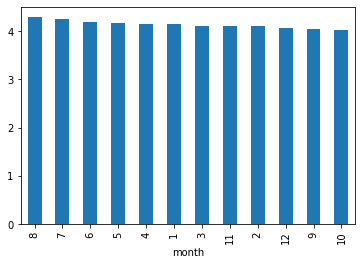

In [177]:
playstore_df.groupby(by='month')['Rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [179]:
playstore_df.groupby(by='month')['Installs'].sum().sort_values(ascending=False)

month
7     74442911579
8     68668379529
6      8186207674
5      6232315327
4      2893864919
11     1618368297
1      1186499286
3      1186028825
12     1150350147
2      1017961455
10      590374124
9       460172325
Name: Installs, dtype: int64

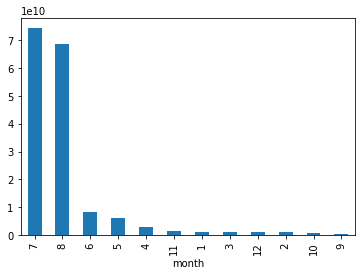

In [180]:
playstore_df.groupby(by='month')['Installs'].sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

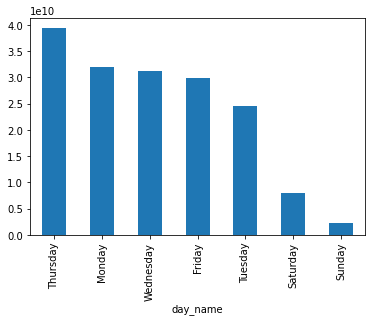

In [181]:
playstore_df.groupby(by='day_name')['Installs'].sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

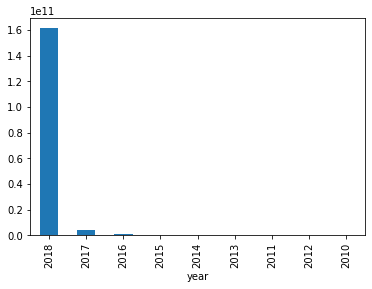

In [182]:
playstore_df.groupby(by='year')['Installs'].sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

##### Insights :

##### 1. Average Rating are almost same regardless of month or day of week.
##### 2. Most Apps are installed in month of August
##### 3. Most Apps are installed in day of week : Thursday
##### 4. App installs are increasing rapidly with each year with maximum being in 2018.